# Overwatch Open

This data has been given to me coutesy of /u/Falcon_Kick.

He did his own analysis at https://www.reddit.com/r/Overwatch/comments/59i3vr/overwatch_hero_meta_report_a_meta_divided

In [1]:
import pandas as pd

data = pd.read_csv('TournamentData.csv')

data.head()

,Season,Date,Tournament,Round,Map,Side,Match Duration,Team,Attack/Defend Success?,Offense/Defense/KotH,...,Player,Hero,Hero swapped From,Swap Location,Start Time,End Time,Time Played,Match Share,Time Played (sec),Duration Calculation Column
0,2,9/25/2016,Overwatch Open,NA Uppper Bracket Round 2,Dorado,1,0:08:19,Liquid,No,Defense,...,IID,Mei,NaN,NaN,2:58:17,3:04:46,0:06:29,77.96%,389,0:08:19
1,2,9/25/2016,Overwatch Open,NA Uppper Bracket Round 2,Dorado,1,0:08:19,Liquid,No,Defense,...,Dahang,Zenyatta,NaN,NaN,2:58:17,3:06:36,0:08:19,100.00%,499,0:00:00
2,2,9/25/2016,Overwatch Open,NA Uppper Bracket Round 2,Dorado,1,0:08:19,Liquid,No,Defense,...,Rapha,Zarya,NaN,NaN,2:58:17,3:04:46,0:06:29,77.96%,389,0:00:00
3,2,9/25/2016,Overwatch Open,NA Uppper Bracket Round 2,Dorado,1,0:08:19,Liquid,No,Defense,...,Azk,McCree,NaN,NaN,2:58:17,3:04:46,0:06:29,77.96%,389,0:00:00
4,2,9/25/2016,Overwatch Open,NA Uppper Bracket Round 2,Dorado,1,0:08:19,Liquid,No,Defense,...,Mesr,Reinhardt,NaN,NaN,2:58:17,3:06:06,0:07:49,93.99%,469,0:00:00


## Playtime

Firstly, I wanted to see how much time is played on each individual hero.

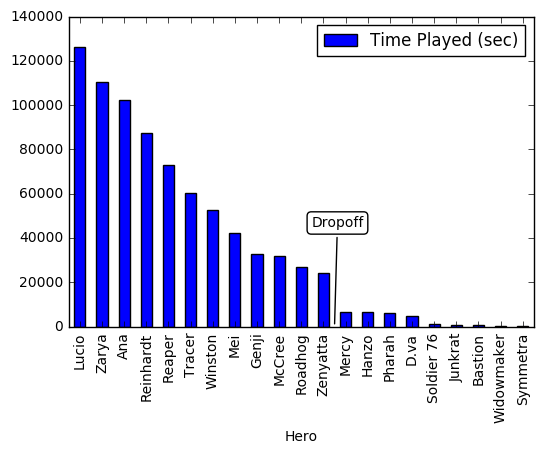

In [2]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

%matplotlib inline  

fig, axs = plt.subplots()

hero_time = data.groupby(['Hero'])[['Time Played (sec)']].sum().sort_values('Time Played (sec)', ascending=False)
hero_time.plot(kind='bar', ax=axs)

axs.annotate("Dropoff",
            xy=(11.5, 0),
            xytext=(10.45, 45000),
            bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="-"))

There is a very significant drop in playtime after Zenyatta, leaving 12 heroes before the drop off.

We can consider these 12 "meta" heroes and we will be focused on them for the most part.

### Who's Missing?

An interesting thing to note:

There are currently 22 heroes in the roster at the time of this data collection, however, only 21 heroes appear in the data.
Torbjorn was not played at all in this tournament.

In [3]:
for index, hero in enumerate(data['Hero'].unique()):
    print index + 1, '\t', hero

data[data['Hero'] == 'Torbjorn']

1 	Mei
2 	Zenyatta
3 	Zarya
4 	McCree
5 	Reinhardt
6 	Lucio
7 	Mercy
8 	Roadhog
9 	Winston
10 	Ana
11 	Pharah
12 	Tracer
13 	D.va
14 	Reaper
15 	Genji
16 	Bastion
17 	Soldier 76
18 	Symmetra
19 	Hanzo
20 	Junkrat
21 	Widowmaker


,Season,Date,Tournament,Round,Map,Side,Match Duration,Team,Attack/Defend Success?,Offense/Defense/KotH,...,Player,Hero,Hero swapped From,Swap Location,Start Time,End Time,Time Played,Match Share,Time Played (sec),Duration Calculation Column


## Gametypes

Do heroes get played more depending on the gametype?

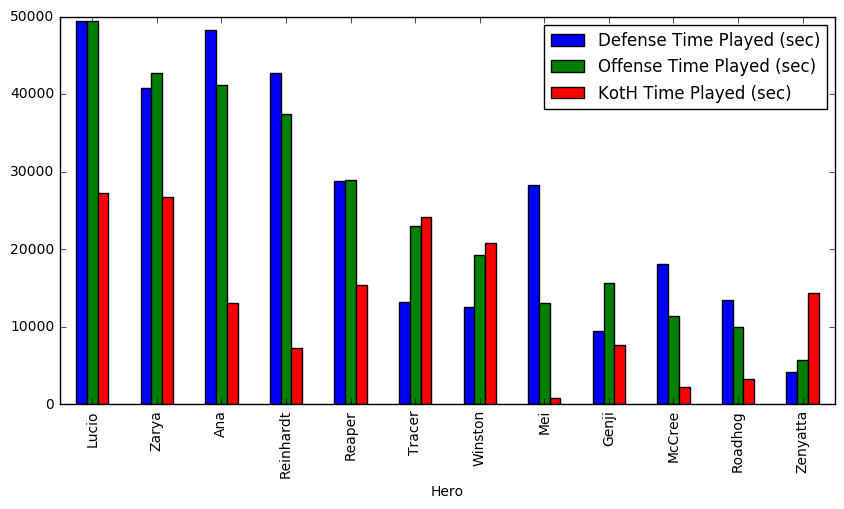

In [4]:
HeroTimeTotal = data.groupby('Hero').sum()

HeroTimeTotal.rename(columns={'Time Played (sec)': 'Total Time Played (sec)'}, inplace=True)

HeroTimeTotal['Defense Time Played (sec)'] = data[data['Offense/Defense/KotH'] == 'Defense'].groupby('Hero')['Time Played (sec)'].sum()
HeroTimeTotal['Offense Time Played (sec)'] = data[data['Offense/Defense/KotH'] == 'Offense'].groupby('Hero')['Time Played (sec)'].sum()
HeroTimeTotal['KotH Time Played (sec)'] = data[data['Offense/Defense/KotH'] == 'KotH'].groupby('Hero')['Time Played (sec)'].sum()

HeroTimeTotal.sort_values('Total Time Played (sec)', ascending=False).nlargest(12, 'Total Time Played (sec)')[['Defense Time Played (sec)', 'Offense Time Played (sec)', 'KotH Time Played (sec)']].plot(kind='bar', figsize=[10,5])

### Gametype Playtime Normalization

Let's look again after normalizing the data to show percentage of time that hero has played in that gametype.

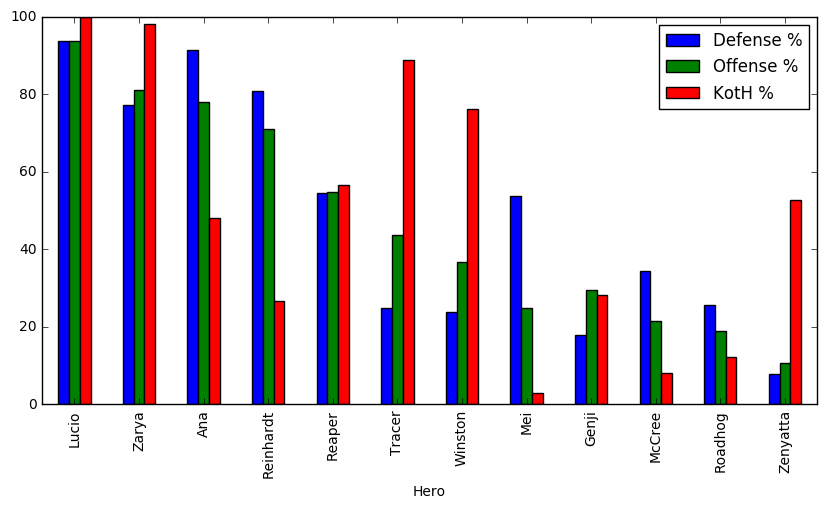

In [5]:
totaldef = HeroTimeTotal['Defense Time Played (sec)']
totaloff = HeroTimeTotal['Offense Time Played (sec)']
totalkth = HeroTimeTotal['KotH Time Played (sec)']

HeroTimeTotal['Defense %'] = totaldef.apply(lambda x: x/totaldef.sum())
HeroTimeTotal['Offense %'] = totaloff.apply(lambda x: x/totaloff.sum())
HeroTimeTotal['KotH %'] = totalkth.apply(lambda x: x/totalkth.sum())

HeroTimeTotal.sort_values('Total Time Played (sec)', ascending=False).nlargest(12, 'Total Time Played (sec)')[['Defense %', 'Offense %', 'KotH %']].apply(lambda x: x*6*100).plot(kind='bar', figsize=[10,5])

### Split and Organize by Gametype

Take a look at the top 6 heroes for each gametype.

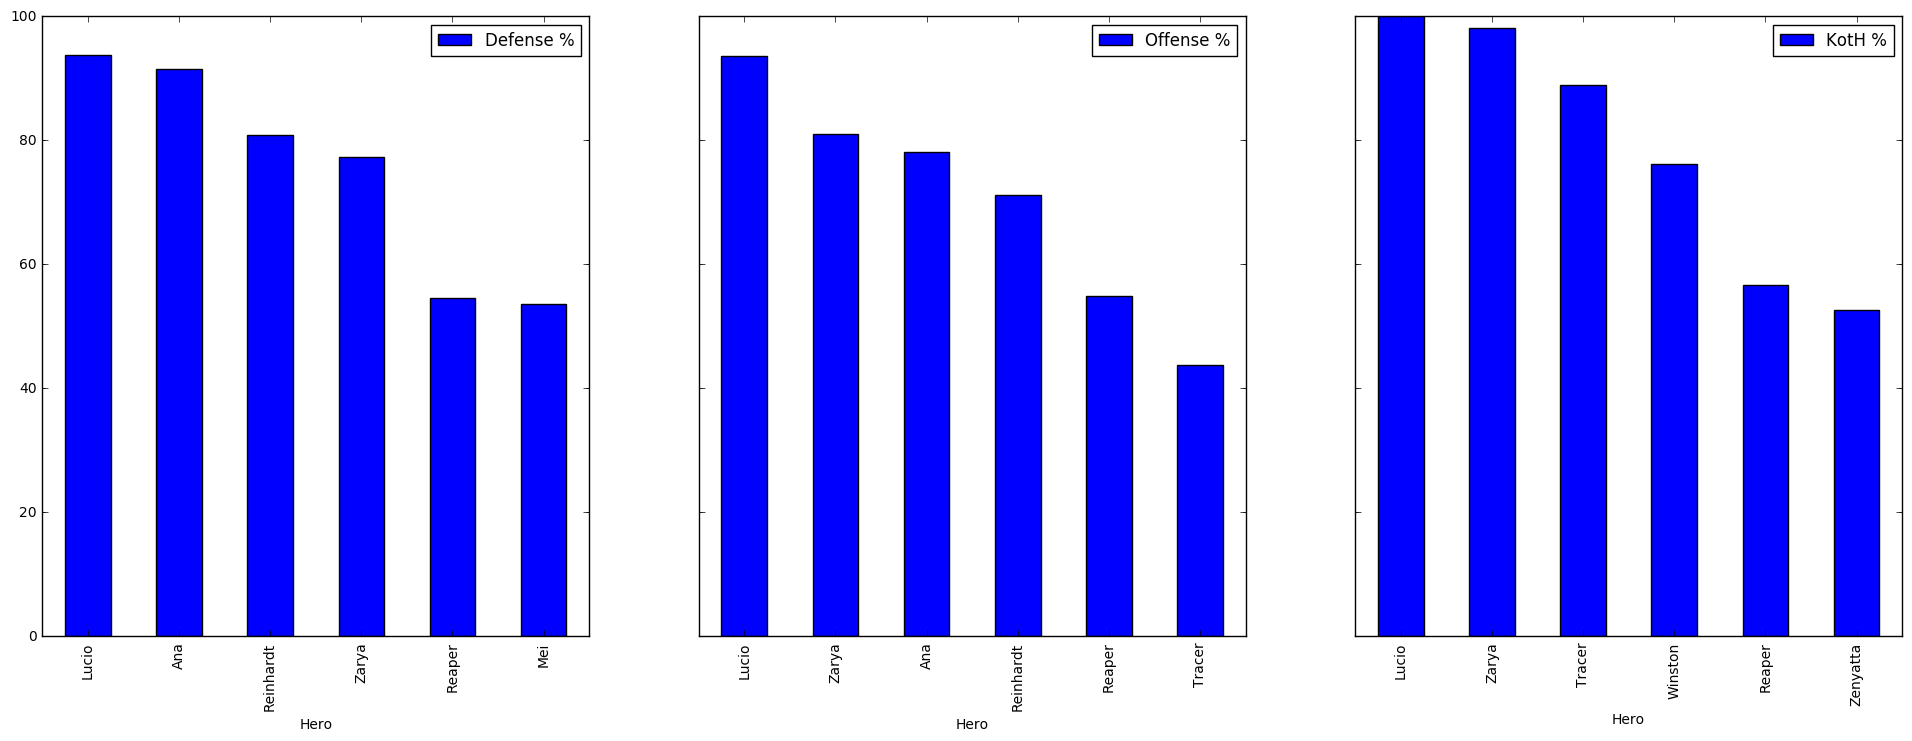

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True,  figsize=(24, 8))
HeroTimeTotal.nlargest(6,'Defense %').apply(lambda x: x*6*100).plot(y='Defense %', kind='bar', ax=axs[0])
HeroTimeTotal.nlargest(6,'Offense %').apply(lambda x: x*6*100).plot(y='Offense %', kind='bar', ax=axs[1])
HeroTimeTotal.nlargest(6,'KotH %').apply(lambda x: x*6*100).plot(y='KotH %', kind='bar', ax=axs[2])

In [7]:
pd.DataFrame({
        'Defense': HeroTimeTotal.sort_values('Defense %', ascending=False).index.values, 
        'Offense': HeroTimeTotal.sort_values('Offense %', ascending=False).index.values, 
        'KotH': HeroTimeTotal.sort_values('KotH %', ascending=False).index.values
    }).head(6)

,Defense,KotH,Offense
0,Lucio,Lucio,Lucio
1,Ana,Zarya,Zarya
2,Reinhardt,Tracer,Ana
3,Zarya,Winston,Reinhardt
4,Reaper,Reaper,Reaper
5,Mei,Zenyatta,Tracer


Lucio, Zarya, and Reaper are within the top 6 for all 3 gametypes.  The top 6 of each gametype also consist of 2 tanks, 2 supports, and 2 offense/defense (dps) heroes creating the popular 2/2/2 setup most players follow.

## Hero Classes

So now that we see which heroes get the most play time, let's see how much time is spent on each class.

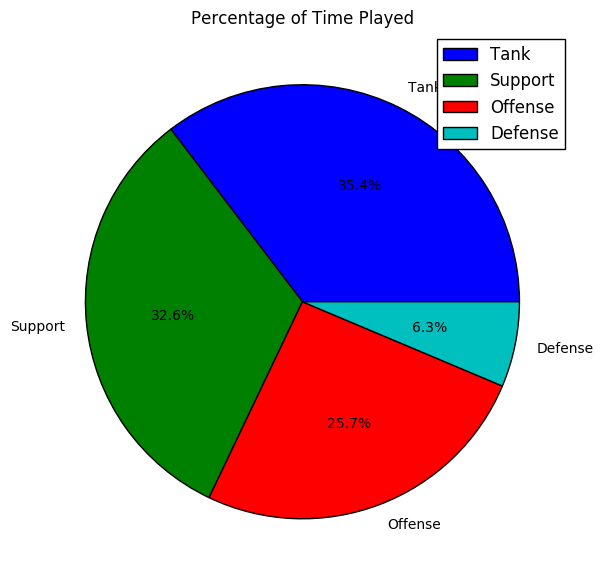

In [8]:
hero_types = {
    'Genji': 'Offense',
    'McCree': 'Offense',
    'Pharah': 'Offense',
    'Reaper': 'Offense',
    'Soldier 76': 'Offense',
    'Sombra': 'Offense',
    'Tracer': 'Offense',
    
    'Bastion': 'Defense',
    'Hanzo': 'Defense',
    'Junkrat': 'Defense',
    'Mei': 'Defense',
    'Torbjorn': 'Defense',
    'Widowmaker': 'Defense',
    
    'D.va': 'Tank',
    'Reinhardt': 'Tank',
    'Roadhog': 'Tank',
    'Winston': 'Tank',
    'Zarya': 'Tank',
    
    'Ana': 'Support',
    'Lucio': 'Support',
    'Mercy': 'Support',
    'Symmetra': 'Support',
    'Zenyatta': 'Support'
}

wdata = data
wdata['Hero Class'] = wdata['Hero'].map(hero_types)

wdata.groupby('Hero Class').sum().sort_values('Time Played (sec)', ascending=False).plot(kind='pie', y='Time Played (sec)', title='Percentage of Time Played', autopct='%1.1f%%', figsize=(7,7), label='')

###  Tank > Support > Offense/Defense

There seems to be a close 3 way split between tank, support, and offense/defense heroes.  This is mostly because there is an inherent 2/2/2 meta where teams run 2 tanks, 2 supports, and 2 offense/defense (dps) heroes.

Let's see how this is spread over our "meta" heroes.

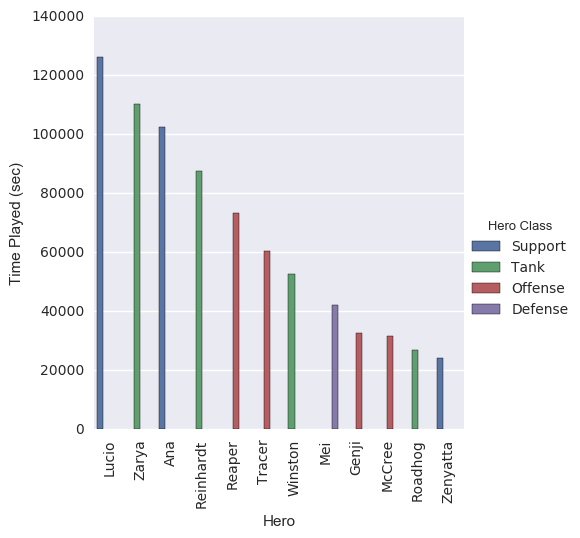

In [9]:
import seaborn as sns

time = []
for hero in hero_time.index.values:
    time.append(data[data['Hero'] == hero]['Time Played (sec)'].sum())

wdata = pd.DataFrame({'Hero': hero_time.index.values, 'Time Played (sec)': time})
wdata['Hero Class'] = wdata['Hero'].map(hero_types)

g = sns.factorplot(x='Hero', y='Time Played (sec)', size=5, aspect=1,
    data=wdata.nlargest(12, 'Time Played (sec)'), hue='Hero Class', kind="bar", ci=None)
g.set_xticklabels(rotation=90)

The top 4 heroes are supports and tanks, and the next 2 are offense. 

The top 6 heroes follow the 2/2/2 meta so many players like to follow.

Mei is the only "meta" defensive hero coming in at 8th.

In the "meta" heroes, 4 are tanks, 3 are supports, 4 are offense, and 1 is defense. Out of the 3 supports, 2 are within the top 3 and the 3rd is 12th.

## Regions

Do the playtimes on specific classes vary from each region?

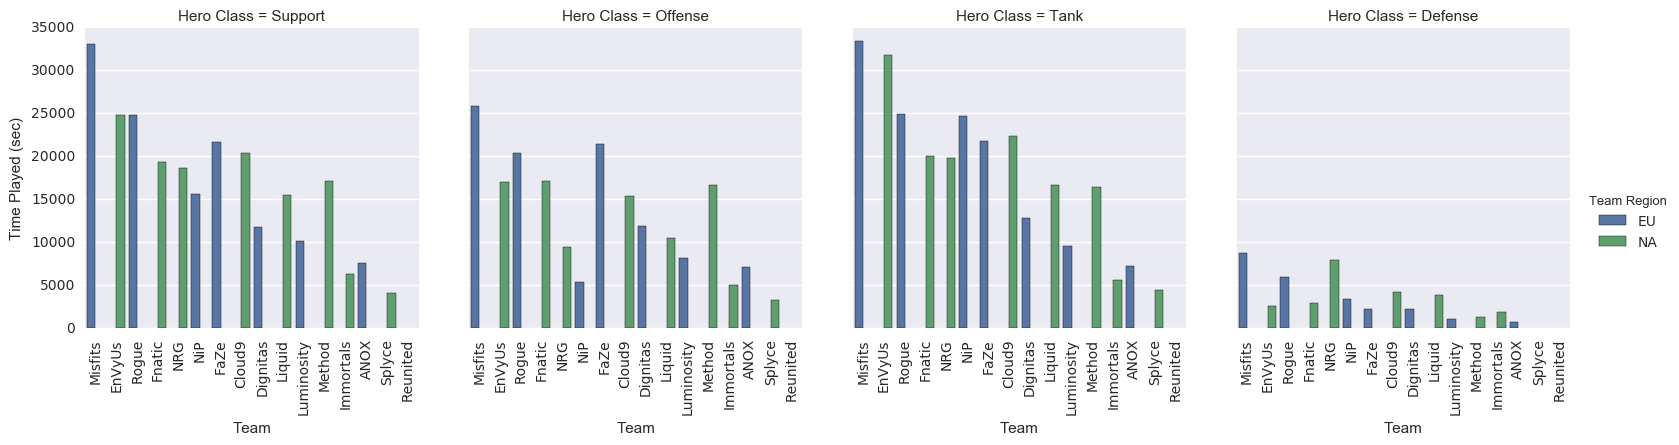

In [10]:
wdata = data[['Team', 'Player', 'Map', 'Offense/Defense/KotH', 'Hero', 'Hero Class', 'Time Played (sec)']]
l = []
for (hclass, team), group in wdata.groupby(['Hero Class', 'Team']):
    l.append([team, hclass, group['Time Played (sec)'].sum()])

df = pd.DataFrame(l, columns=['Team', 'Hero Class', 'Time Played (sec)'])
region_map = {
    'Reuinited': 'EU',
    'NiP': 'EU',
    'Dignitas': 'EU',
    'FaZe': 'EU',
    
    'Rogue': 'EU',
    'ANOX': 'EU',
    'Misfits': 'EU',
    'Luminosity': 'EU',
    
    'EnVyUs': 'NA',
    'Splyce': 'NA',
    'NRG': 'NA',
    'Liquid': 'NA',
    
    'Cloud9': 'NA',
    'Method': 'NA',
    'Fnatic': 'NA',
    'Immortals': 'NA',
}

matches_won_map = {
    'Reuinited': 0,
    'NiP': 2,
    'Dignitas': 1,
    'FaZe': 2,
    
    'Rogue': 3,
    'ANOX': 0,
    'Misfits': 5,
    'Luminosity': 1,
    
    'EnVyUs': 4,
    'Splyce': 0,
    'NRG': 2,
    'Liquid': 1,
    
    'Cloud9': 2,
    'Method': 1,
    'Fnatic': 3,
    'Immortals': 0,
}

df['Team Region'] = df['Team'].map(region_map)
df['Wins'] = df['Team'].map(matches_won_map)

g = sns.factorplot(x='Team', y='Time Played (sec)', col='Hero Class', col_wrap=4,
    data=df.sort_values('Wins', ascending=False), hue='Team Region', kind="bar")
g.set_xticklabels(rotation=90)

## Class Playtime by Region Normalization 

We need to normalize the time played on each hero since some teams have more overall playtime than others.

C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


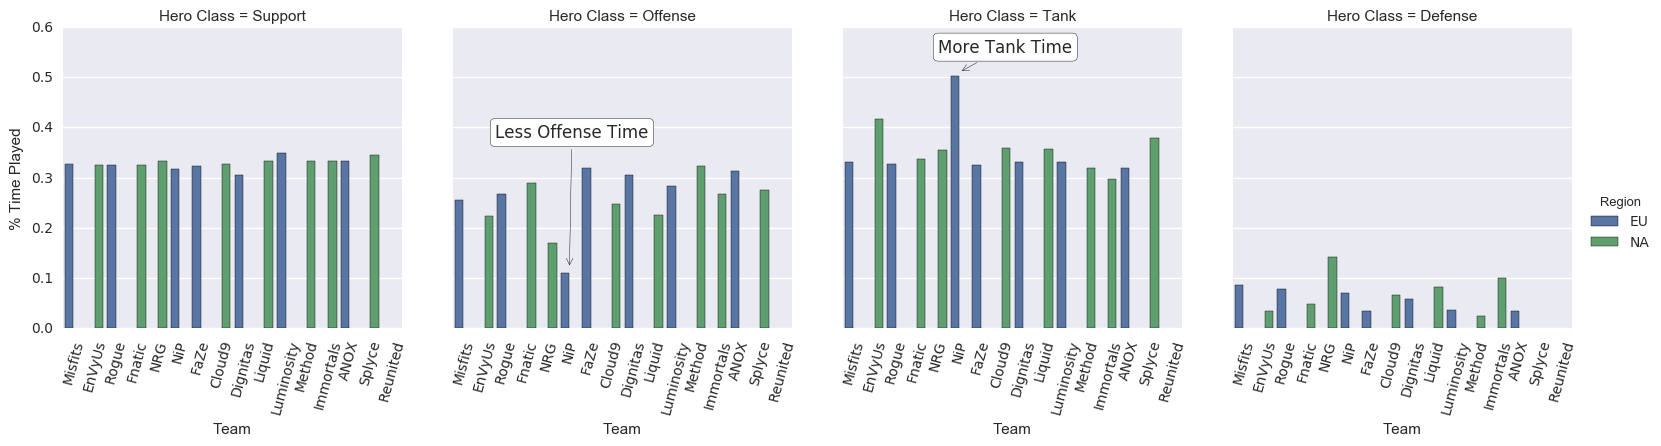

In [11]:
wdata = data[['Team', 'Hero', 'Hero Class', 'Time Played (sec)']]

wdata['Total Team Time Played'] = wdata['Team'].apply(lambda x: wdata[wdata['Team'] == x]['Time Played (sec)'].sum())
wdata['% Time Played'] = wdata['Time Played (sec)']/wdata['Total Team Time Played']

l=[]
for (hclass, team), group in wdata.groupby(['Hero Class', 'Team']):
    l.append([team, hclass, group['Time Played (sec)'].sum(), group['% Time Played'].sum()])
    
df = pd.DataFrame(l, columns=[
        'Team',
        'Hero Class',
        'Time Played (sec)',
        '% Time Played'
    ])

df['Region'] = df['Team'].map(region_map)
df['Wins'] = df['Team'].map(matches_won_map)

g = sns.factorplot(x='Team', y='% Time Played', col='Hero Class', col_wrap=4,
    data=df.sort_values('Wins', ascending=False), hue='Region', kind="bar")
g.set_xticklabels(rotation=75)

g.axes[1].annotate("Less Offense Time",
            xy=(5, 0.12),
            xytext=(1.5, 0.38),
            bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="->"))

g.axes[2].annotate("More Tank Time",
            xy=(5, 0.51),
            xytext=(4, 0.55),
            bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="->"))

There is a significant shift from offensive hero playtime to tank playtime for NA's NiP team.

In [12]:
l = []
for team, group in data.groupby('Team'): 
    l.append([
            team,
            group[group['Hero Class'] == 'Offense']['Time Played (sec)'].sum(),
            group[group['Hero Class'] == 'Defense']['Time Played (sec)'].sum(),
            group[group['Hero Class'] == 'Tank']['Time Played (sec)'].sum(),
            group[group['Hero Class'] == 'Support']['Time Played (sec)'].sum(),
            group['Time Played (sec)'].sum()
        ])
    
Team_Class = pd.DataFrame(l, columns=[
        'Team', 
        'Time Played Offense (sec)', 
        'Time Played Defense (sec)', 
        'Time Played Tank (sec)', 
        'Time Played Support (sec)', 
        'Total Time Played (sec)'
    ])

Team_Class['% Time Played Offense'] = Team_Class['Time Played Offense (sec)']/Team_Class['Total Time Played (sec)']*100
Team_Class['% Time Played Defense'] = Team_Class['Time Played Defense (sec)']/Team_Class['Total Time Played (sec)']*100
Team_Class['% Time Played Tank'] = Team_Class['Time Played Tank (sec)']/Team_Class['Total Time Played (sec)']*100
Team_Class['% Time Played Support'] = Team_Class['Time Played Support (sec)']/Team_Class['Total Time Played (sec)']*100

Team_Class['Region'] = Team_Class['Team'].map(region_map)

Team_Class.groupby('Region')['% Time Played Offense','% Time Played Defense','% Time Played Tank','% Time Played Support'].mean()

,% Time Played Offense,% Time Played Defense,% Time Played Tank,% Time Played Support
Region,,,,
EU,26.482957,5.698861,35.256463,32.561719
NA,25.262315,6.272327,35.265363,33.199994


North America and Europe both prioritized tanks in their compositions, but NA shifted some of their playtime from offensive to defensive and support heroes. Although, these differences are below 1% and could be negligible.

In [13]:
data['Team Region'] = data['Team'].map(region_map)
wdata = data.groupby(['Hero', 'Team Region'])
l = []
for (hero, region), group in wdata:
    l.append(float(group['Time Played (sec)'].sum())/(data[data['Team Region'] == region]['Time Played (sec)'].sum() / 6) * 100)
    
wdata = wdata[['Time Played (sec)']].sum()
wdata['Time Played (sec)']
wdata['% Time Played'] = l
wdata

Time Played (sec)  % Time Played
Hero       Team Region                                  
Ana        EU                       47969      75.051240
           NA                       52528      82.387816
Bastion    EU                          16       0.025033
           NA                         507       0.795207
D.va       EU                         904       1.414378
           NA                        3612       5.665260
Genji      EU                       21118      33.040757
           NA                        8697      13.640855
Hanzo      EU                        4667       7.301885
           NA                        1773       2.780871
Junkrat    EU                         214       0.334820
           NA                         703       1.102624
Lucio      EU                       61321      95.941485
           NA                       59788      93.774801
McCree     EU                       15769      24.671830
           NA                       15733      24.676506
Mei        EU                       19669      30.773684
           NA                       21304      33.414370
Mercy      EU                        2893       4.526324
           NA                        3494       5.480183
Pharah     EU                        2279       3.565673
           NA                        3484       5.464498
Reaper     EU                       35536      55.598842
           NA                       35086      55.030820
Reinhardt  EU                       42070      65.821795
           NA                       43560      68.321910
Roadhog    EU                       10380      16.240319
           NA                       15454      24.238907
Soldier 76 EU                         246       0.384886
           NA                         748       1.173205
Symmetra   NA                         161       0.252521
Tracer     EU                       25102      39.274036
           NA                       30792      48.295873
Widowmaker EU                          16       0.025033
           NA                         429       0.672867
Winston    EU                       23307      36.465618
           NA                       25804      40.472419
Zarya      EU                       57755      90.362200
           NA                       48712      76.402591
Zenyatta   EU                       12264      19.187984
           NA                       10177      15.962169

Lucio is played 93+% of the total time in both regions.

Ana, Reinhardt, Roadhog, Winston, and Mei are played more in NA.

Zarya and Genji are played more in EU.


### Correllations Between Hero Stats and Playtime

In [14]:
wdata = data[['Hero','Time Played (sec)']]

l = []
for hero, group in wdata.groupby('Hero'):
    l.append({'Hero': hero, 'Time Played (sec)': group['Time Played (sec)'].sum()})
    
wdata = pd.DataFrame(l)

# [[Health, Shields, Armor], Mobility, Damage Mitigation]
# Mobility ranked [0 - 5] with 0 being no mobility and 5 being extremely mobile
    # Lucio is ranked at 6 because he gives mobility to all of his teammates on top of being a 5
shields_map = {
    'Genji': [[200, 0, 0], 5, 1],
    'McCree': [[200, 0, 0], 1, 0],
    'Pharah': [[200, 0, 0], 4, 0],
    'Reaper': [[250, 0, 0], 2, 0],
    'Soldier 76': [[200, 0, 0], 2, 0],
    'Sombra': [[200, 0, 0], 4, 0],
    'Tracer': [[150, 0, 0], 5, 0],
    
    'Bastion': [[200, 0, 100], 0, 0],
    'Hanzo': [[200, 0, 0], 1, 0],
    'Junkrat': [[200, 0, 0], 2, 0],
    'Mei': [[250, 0, 0], 1, 1],
    'Torbjorn': [[200, 0, 0], 0, 0],
    'Widowmaker': [[200, 0, 0], 3, 0],
    
    'D.va': [[100, 0, 400], 4, 1],
    'Reinhardt': [[300, 0, 200], 1, 1],
    'Roadhog': [[600, 0, 0], 0, 0],
    'Winston': [[400, 0, 100], 4, 1],
    'Zarya': [[200, 200, 0], 0, 1],
    
    'Ana': [[200, 0, 0], 0, 0],
    'Lucio': [[200, 0, 0], 6, 1],
    'Mercy': [[200, 0, 0], 2, 0],
    'Symmetra': [[100, 100, 0], 0, 0],
    'Zenyatta': [[50, 150, 0], 0, 0]
}

# [Non-Ult Max Instant Damage, Ult Charge, Interruptable Ult]
damage_map = {
    'Genji': [28*3*2+30, 1200, 0],
    'McCree': [45*6+25, 1200, 1],
    'Pharah': [120, 1500, 1],
    'Reaper': [7*20*2, 1500, 1],
    'Soldier 76': [17*2+120, 1660, 0],
    'Sombra': [16, 0, 0],
    'Tracer': [12*2, 900, 0],
    
    'Bastion': [20*2, 1650, 0],
    'Hanzo': [75*6, 1200, 0],
    'Junkrat': [120+120+80, 1250, 1],
    'Mei': [75*2, 1000, 0],
    'Torbjorn': [15*10*2+14, 1300, 0],
    'Widowmaker': [120*2.5, 1100, 0],
    
    'D.va': [3*8*2, 1100, 0],
    'Reinhardt': [300+100, 1100, 0], 
    'Roadhog': [30+9*25*2, 1600, 1],
    'Winston': [3+50, 1100, 0],
    'Zarya': [45*2, 1500, 0],
    
    'Ana': [5+80+60+80, 1300, 0],
    'Lucio': [16*2, 2100, 0],
    'Mercy': [20*2, 1300, 0],
    'Symmetra': [125, 800, 1],
    'Zenyatta': [46*2, 1650, 0]
}

wdata['Offense Time (sec)'] = HeroTimeTotal['Offense Time Played (sec)'].values
wdata['Defense Time (sec)'] = HeroTimeTotal['Defense Time Played (sec)'].values
wdata['KotH Time (sec)'] = HeroTimeTotal['KotH Time Played (sec)'].values

hsa = wdata['Hero'].map(shields_map)
ult = wdata['Hero'].map(damage_map)

wdata['Health'] = hsa.apply(lambda x: x[0][0])
wdata['Shields'] = hsa.apply(lambda x: x[0][1])
wdata['Armor'] = hsa.apply(lambda x: x[0][2])
wdata['Mobility'] = hsa.apply(lambda x: x[1])
wdata['Damage Mitigation'] = hsa.apply(lambda x: x[2])

wdata['Instant Damage'] = ult.apply(lambda x: x[0])
wdata['Ult Charge'] = ult.apply(lambda x: x[1])
wdata['Interruptable Ult'] = ult.apply(lambda x: x[2])

wdata[['Offense Time (sec)','Defense Time (sec)','KotH Time (sec)','Health','Shields','Armor','Mobility','Damage Mitigation']].corr()
# wdata[['Offense Time (sec)','Defense Time (sec)','KotH Time (sec)','Time Played (sec)','Instant Damage','Ult Charge','Interruptable Ult']].corr()

,Offense Time (sec),Defense Time (sec),KotH Time (sec),Health,Shields,Armor,Mobility,Damage Mitigation
Offense Time (sec),1.000000,0.943474,0.719859,0.107055,0.233003,-0.085147,0.084379,0.460034
Defense Time (sec),0.943474,1.000000,0.445406,0.180471,0.069244,-0.070301,-0.032281,0.443434
KotH Time (sec),0.719859,0.445406,1.000000,-0.163875,0.416658,0.032530,0.333849,0.348092
Health,0.107055,0.180471,-0.163875,1.000000,-0.326088,-0.069674,-0.096348,0.107502
Shields,0.233003,0.069244,0.416658,-0.326088,1.000000,-0.157063,-0.424514,0.092319
Armor,-0.085147,-0.070301,0.032530,-0.069674,-0.157063,1.000000,0.149086,0.460773
Mobility,0.084379,-0.032281,0.333849,-0.096348,-0.424514,0.149086,1.000000,0.356462
Damage Mitigation,0.460034,0.443434,0.348092,0.107502,0.092319,0.460773,0.356462,1.000000


While it isn't strong, there is an interesting correllation between time played in KotH and the amount of shields or mobility a hero has, as well as the time played on offense and whether or not a hero has a damage mitigation skill.

## Conclusion

Lucio and Zarya are very strong on all gametypes with Lucio being played about 94% and Zarya being played about 84% of the time.
However, Zarya is played 14% more in EU than in NA.  The introduction of Sombra may be an attempt to bring the playtimes of these heroes more inline with the rest because of her ability to completely negate Lucio's ult and disable Zarya's versatile damage mitigation as well as remove 50% of her effective health pool.

Heroes with shields and mobility are popular in KotH matches while heroes with damage mitigation are more popular on payload (offense and defense) maps.

Defensive heroes are outclassed by offensive heroes. While defensive heroes excel at area control, their damage is too inconsistant and slow at this level of play. In other words, the best defense is a good offense. The exception to this is Mei, and I'll explain why in a moment.

#### 3 by 3

Ana's ult boosts the damage dealt, increases speed, and mitigates incoming damage to the hero it is applied to. This becomes extremely effective when used on a tank with a large healthpool (especially with armor) that can dish out consistant damage (Reinhardt's hammer, Winston's tesla cannon, and Roadhog's ult). The idea is to build a composition that stays alive through the enemy teams poke damage with healing and then rush in with multiple heroes that can benefit from Ana's ult and overwhelm the enemy team. This led to a composition of 3 tanks and 3 supports (and a few variations).

#### What About Mei?

NA's NiP team shifted some of their playtime from offensive heroes to tanks. This coupled with the increased playtime on Ana, Renhardt, Roadhog, and Winston in NA marks the beginning of the 3 by 3 composition. This may also explain the lower playtime on Zarya in the NA, where they would substitute her with another hero that benefits more from Ana ult (Roadhog/Winston). Because of this composition played around the Ana ult, Mei began seeing more play because of her ability to completely shut down the Ana ult. 

This explains why Mei is the only defensive hero in our "meta" heroes and makes up almost the entire playtime for defensive heroes.